In [54]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from stablab import (semicirc, winding_number, Evans_plot, emcset,
                       Evans_compute, Struct, soln, profile_flux,
                       reflect_image)
from stablab.evans import LdimRdim
from stablab.root_finding import root_solver1

In [41]:
# A matrix and compound Ak matrix for Evans Function ODE
from capillarity import A, Ak

In [42]:
# Profile ODE and its jacobian
from capillarity import profile_ode, profile_jacobian

In [43]:
# parameters
p = Struct()
p.gamma = 1.4
p.vp = .15

    
# dependent parameters
p.a = -(1-p.vp)/(1-p.vp**(-p.gamma))

In [44]:
# This example solves the profile for $d = -0.45$ and then uses
# continuation thereafter
d_vals = -np.arange(0.45, 0.451, 0.001)

In [45]:
# solve profile. Use continuation as an example
s = Struct()
for j,curr_d_val in enumerate(d_vals):
    p.d = curr_d_val

    # profile
    s.n = 2 # this is the dimension of the profile ode
    # we divide the domain in half to deal with the
    # non-uniqueness caused by translational invariance
    # s.side = 1 means we are solving the profile on the interval [0,X]
    s.side = 1
    s.F = profile_ode # profile_ode is the profile ode
    s.Flinear = profile_jacobian # profile_jacobian is the profile ode Jacobian
    s.UL = np.array([1, 0]) # These are the endstates of the profile and its derivative at x = -infty
    s.UR = np.array([p.vp, 0]) # These are the endstates of the profile and its derivative at x = +infty
    s.phase = 0.5*(s.UL+s.UR) # this is the phase condition for the profile at x = 0
    s.order = [0] # this indicates to which componenet the phase conditions is applied
    s.stats = 'on' # this prints data and plots the profile as it is solved

    if j == 0:
        # there are some other options you specify. You can look in profile_flux to see them
        p,s = profile_flux(p,s) # solve profile for first time
        s_old = s
    else:
        # this time we are using continuation
        p,s = profile_flux(p,s,s_old); # solve profile

Profile boundary error:  0.006625370743212331
Profile boundary error:  0.0022133523632964567
Profile boundary error:  0.0005818844597306254
Profile boundary error:  0.00011511282058603332
Profile boundary error:  4.523093783319327e-05
Profile boundary error:  4.5242997549077885e-05
Profile boundary error:  4.524575963863382e-05
Profile boundary error:  4.53199177692259e-05
Profile boundary error:  4.53161109971344e-05
Profile boundary error:  4.534421274158642e-05


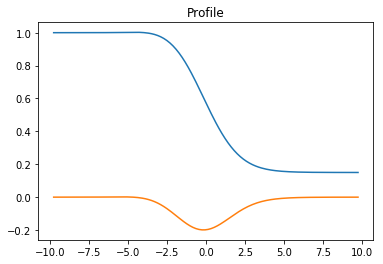

In [46]:
# plot the profile
x = np.linspace(s.L,s.R,200)
y = soln(x,s)
plt.title("Profile")
plt.plot(x,y[:,0].real)
plt.plot(x,y[:,1].real)
plt.show()

In [47]:
# structure variables

# Here you can choose the method you use for the Evans function, or you can set the option
# to default and let it choose. [2,2] is the size of the manifold evolving from - and + infy in the
# Evans solver. 'front' indicates you are solving for a traveling wave front and not a periodic solution
# s,e,m,c = emcset(s,'front',LdimRdim(A,s,p),'default',A) # default for capillarity is reg_reg_polar
# s,e,m,c = emcset(s,'front',[2,2],'reg_adj_polar',A)
# s,e,m,c = emcset(s,'front',[2,2],'adj_reg_polar',A)
# s,e,m,c = emcset(s,'front',[2,2],'reg_reg_polar',A)

# This choice solves the right hand side via exterior products
s,e,m,c = emcset(s, 'front', [2,2], 'adj_reg_compound', A, Ak)

In [48]:
# display a waitbar
c.stats = 'print' # 'on', 'print', or 'off'
c.ksteps = 2**8

In [49]:
# Preimage Contour
# This is a semi circle. You can also do a semi annulus or a rectangle
circpnts = 30
imagpnts = 30
R = 10
spread = 2
zerodist = 10**(-2)
preimage = semicirc(circpnts,imagpnts,c.ksteps,R,spread,zerodist)

In [50]:
# compute Evans function
halfw, domain = Evans_compute(preimage,c,s,p,m,e)
w = halfw / halfw[0]

Finding the kato basis


In [55]:
# We computed Evans function on half of contour
# We now reflect the image across the real axis
w = reflect_image(w)

In [56]:
# Process and display data
wnd = winding_number(w) # determine the number of roots inside the contour
print("Winding Number: ",wnd)

Winding Number:  0


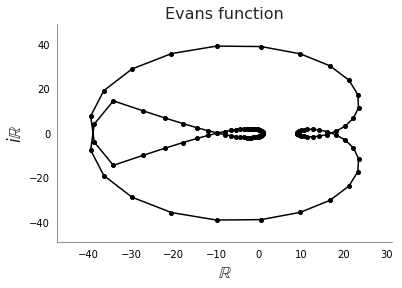

In [57]:
# plot the Evans function (normalized)
Evans_plot(w)